<a href="https://colab.research.google.com/github/dewidiah1212/Data-Visualization/blob/main/Dewi_Diah_Pontisari_Tugas_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/epl-goalScorer(20-21).csv")


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    522 non-null    int64  
 1   id            522 non-null    int64  
 2   player_name   522 non-null    object 
 3   games         522 non-null    int64  
 4   time          522 non-null    int64  
 5   goals         522 non-null    int64  
 6   xG            522 non-null    float64
 7   assists       522 non-null    int64  
 8   xA            522 non-null    float64
 9   shots         522 non-null    int64  
 10  key_passes    522 non-null    int64  
 11  yellow_cards  522 non-null    int64  
 12  red_cards     522 non-null    int64  
 13  position      522 non-null    object 
 14  team_title    522 non-null    object 
 15  npg           522 non-null    int64  
 16  npxG          522 non-null    float64
 17  xGChain       522 non-null    float64
 18  xGBuildup     522 non-null    

In [9]:
print(df.head())

   Unnamed: 0    id      player_name  games  time  goals         xG  assists  \
0           0   647       Harry Kane     35  3097     23  22.174859       14   
1           1  1250    Mohamed Salah     37  3085     22  20.250847        5   
2           2  1228  Bruno Fernandes     37  3117     18  16.019454       12   
3           3   453    Son Heung-Min     37  3139     17  11.023287       10   
4           4   822  Patrick Bamford     38  3085     17  18.401863        7   

          xA  shots  key_passes  yellow_cards  red_cards position  \
0   7.577094    138          49             1          0        F   
1   6.528526    126          55             0          0    F M S   
2  11.474996    121          95             6          0      M S   
3   9.512992     68          75             0          0    F M S   
4   3.782247    107          30             3          0      F S   

          team_title  npg       npxG    xGChain  xGBuildup  
0          Tottenham   19  19.130183  24.99

In [10]:
print(df.describe())

       Unnamed: 0           id       games         time       goals  \
count  522.000000   522.000000  522.000000   522.000000  522.000000   
mean   260.500000  4380.932950   19.643678  1420.068966    1.862069   
std    150.832689  3281.776121   11.619836  1031.604819    3.338851   
min      0.000000    65.000000    1.000000     1.000000    0.000000   
25%    130.250000   839.750000   10.000000   470.250000    0.000000   
50%    260.500000  4627.000000   21.000000  1342.000000    1.000000   
75%    390.750000  7690.500000   30.000000  2319.000000    2.000000   
max    521.000000  9552.000000   38.000000  3420.000000   23.000000   

               xG     assists          xA       shots  key_passes  \
count  522.000000  522.000000  522.000000  522.000000  522.000000   
mean     2.000806    1.289272    1.376029   17.379310   12.963602   
std      3.317946    2.083350    1.886510   21.572664   16.164361   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.0746

In [12]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'player_name', 'games', 'time', 'goals', 'xG',
       'assists', 'xA', 'shots', 'key_passes', 'yellow_cards', 'red_cards',
       'position', 'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')


In [16]:
# Menghitung jumlah gol, durasi bermain, dan assist
total_goals = df['goals'].sum()
total_playing_time = df['time'].sum()
total_assists = df['assists'].sum()
print("Total goals:", total_goals)
print("Total Minutes Played:", total_playing_time)
print("Total Assists:", total_assists)

Total goals: 972
Total Minutes Played: 741276
Total Assists: 673


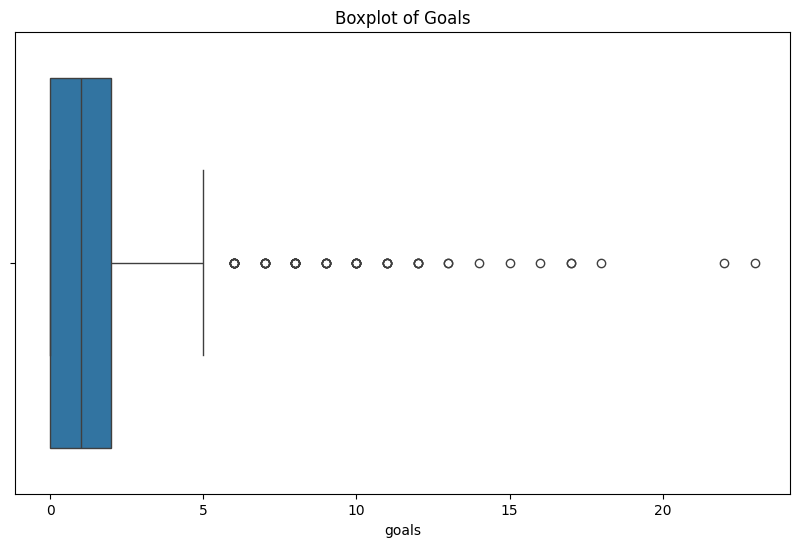

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['goals'])
plt.title('Boxplot of Goals')
plt.show()

In [20]:
Q1 = df['goals'].quantile(0.25)
Q3 = df['goals'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = df[(df['goals'] < lower_fence) | (df['goals'] > upper_fence)]
print("Outliers based on Tukey's fences for goals:")
print(outliers)

Outliers based on Tukey's fences for goals:
    Unnamed: 0    id                player_name  games  time  goals  \
0            0   647                 Harry Kane     35  3097     23   
1            1  1250              Mohamed Salah     37  3085     22   
2            2  1228            Bruno Fernandes     37  3117     18   
3            3   453              Son Heung-Min     37  3139     17   
4            4   822            Patrick Bamford     38  3085     17   
5            5  5555      Dominic Calvert-Lewin     32  2788     16   
6            6   755                Jamie Vardy     34  2848     15   
7            7  8865              Ollie Watkins     37  3330     14   
8            8   314             Ilkay Gündogan     28  2033     13   
9            9  3277        Alexandre Lacazette     30  1928     13   
10          10   468              Callum Wilson     26  2079     12   
11          11   620          Kelechi Iheanacho     25  1452     12   
12          12   986             

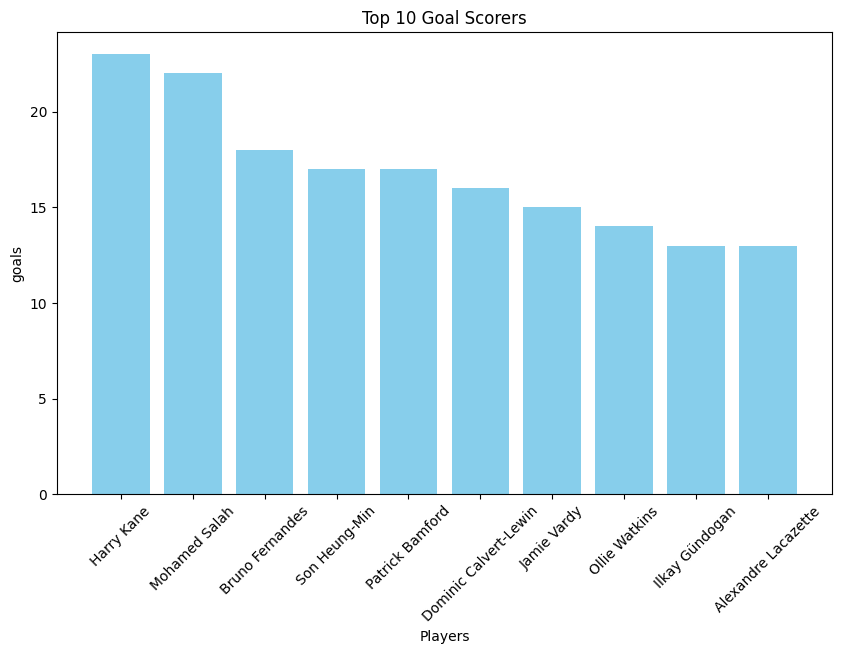

In [25]:
# 10 Player terbanyak mencetak gol
top_10_scorers = df.nlargest(10, 'goals')
plt.figure(figsize=(10, 6))
plt.bar(top_10_scorers['player_name'], top_10_scorers['goals'], color='skyblue')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Players')
plt.ylabel('goals')
plt.xticks(rotation=45)
plt.show()

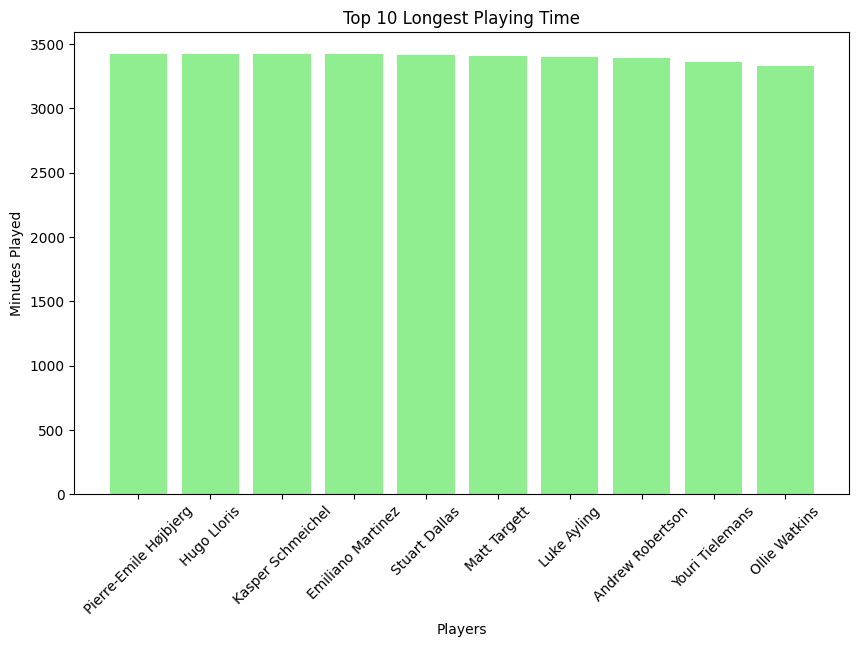

In [24]:
# 10 player terlama durasi bermain
top_10_playing_time = df.nlargest(10, 'time')
plt.figure(figsize=(10, 6))
plt.bar(top_10_playing_time['player_name'], top_10_playing_time['time'], color='lightgreen')
plt.title('Top 10 Longest Playing Time')
plt.xlabel('Players')
plt.ylabel('Minutes Played')
plt.xticks(rotation=45)
plt.show()

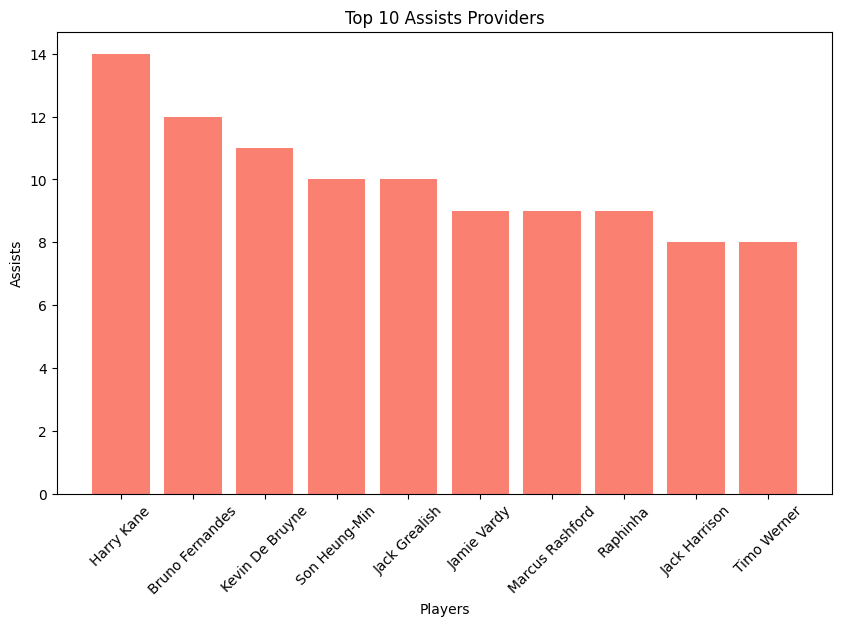

In [23]:
# 10 player terbanyak assist
top_10_assists = df.nlargest(10, 'assists')
plt.figure(figsize=(10, 6))
plt.bar(top_10_assists['player_name'], top_10_assists['assists'], color='salmon')
plt.title('Top 10 Assists Providers')
plt.xlabel('Players')
plt.ylabel('assists')
plt.xticks(rotation=45)
plt.show()

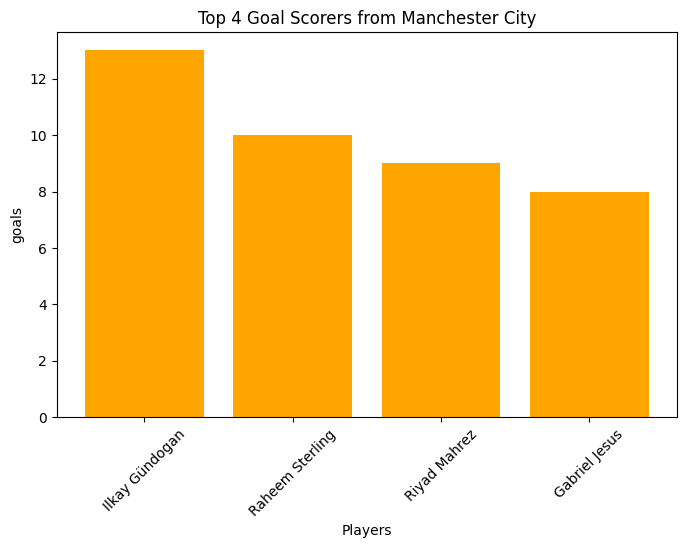

In [29]:
# 4 player pencetak gol terbanyak dari kesebelasan Manchester City
man_city_top_scorers = df[df['team_title'] == 'Manchester City'].nlargest(4, 'goals')
plt.figure(figsize=(8, 5))
plt.bar(man_city_top_scorers['player_name'], man_city_top_scorers['goals'], color='orange')
plt.title('Top 4 Goal Scorers from Manchester City')
plt.xlabel('Players')
plt.ylabel('goals')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Dari kesebelasan mana pencetak gol terbanyak
team_most_goals = df.groupby('team_title')['goals'].sum().idxmax()
print("Team with most goals:", team_most_goals)

Team with most goals: Manchester City


In [33]:
# Jumlah kartu kuning dan merah yang diterima oleh pembuat assist terbanyak
top_assist_provider = df.sort_values(by='assists', ascending=False).iloc[0]
yellow_cards = top_assist_provider['yellow_cards']
red_cards = top_assist_provider['red_cards']
print("Yellow cards received by top assist provider:", yellow_cards)
print("Red cards received by top assist provider:", red_cards)

Yellow cards received by top assist provider: 1
Red cards received by top assist provider: 0


In [36]:
# Siapa yang jumlah assist dan golnya paling banyak dan dari kesebelasan mana
max_goals_and_assists = df[['player_name', 'team_title', 'goals', 'assists']].max()
print("Player with most goals and assists:", max_goals_and_assists['player_name'])
print("Team of the player with most goals and assists:", max_goals_and_assists['team_title'])

Player with most goals and assists: Zack Steffen
Team of the player with most goals and assists: Wolverhampton Wanderers


In [38]:
# 5 kesebelasan yang menyumbangkan gol terbanyak
top_5_goal_contributing_teams = df.groupby('team_title')['goals'].sum().nlargest(5)
print("Top 5 goal-contributing teams:")
print(top_5_goal_contributing_teams)

Top 5 goal-contributing teams:
team_title
Manchester City      77
Manchester United    68
Tottenham            66
Leicester            64
Liverpool            64
Name: goals, dtype: int64


In [41]:
# Urutkan pemain berdasarkan jumlah gol terbanyak tanpa mendapatkan kartu sama sekali
players_without_cards = df[(df['yellow_cards'] == 0) & (df['red_cards'] == 0)].sort_values(by='goals', ascending=False)
print("Players with most goals without receiving any cards:")
print(players_without_cards[['player_name', 'goals']])

Players with most goals without receiving any cards:
         player_name  goals
1      Mohamed Salah     22
3      Son Heung-Min     17
13        Chris Wood     12
28      Riyad Mahrez      9
29     Harvey Barnes      9
..               ...    ...
353      Lys Mousset      0
343    Islam Slimani      0
341       Moise Kean      0
340          Emerson      0
521  Tyrese Francois      0

[164 rows x 2 columns]
